In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
bike_df = pd.read_csv("hour.csv")

In [5]:
bike_df = bike_df.rename(columns = {'weathersit':'weather', 'cnt':'count','mnth':'month','temp':'temperature','hum':'humidity'})
bike_df['season'] = bike_df['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
bike_df['yr'] = bike_df['yr'].map({0:'2011', 1:'2012'})
bike_df['holiday'] = bike_df['holiday'].map({0:'No', 1:'Yes'})
bike_df['weekday'] = bike_df['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
bike_df['workingday'] = bike_df['workingday'].map({0:'No', 1:'Yes'})
bike_df['weather'] = bike_df['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})

In [6]:
bike_df.head()     

,instant,dteday,season,yr,month,hr,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
bike_df.to_csv('input_bike_dataviz.csv')

In [36]:
miss_count = round(len(bike_df['instant']) * 0.05)

miss_index1 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index1:
    bike_df.at[value,'temperature'] = np.nan

miss_index2 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index2:
    bike_df.at[value,'humidity'] = np.nan

miss_index3 = pd.Series(np.random.randint(1,len(bike_df['instant']),miss_count))
for value in miss_index3:
    bike_df.at[value,'windspeed'] = np.nan

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      17379 non-null  int64  
 1   dteday       17379 non-null  object 
 2   season       17379 non-null  object 
 3   yr           17379 non-null  object 
 4   month        17379 non-null  int64  
 5   hr           17379 non-null  int64  
 6   holiday      17379 non-null  object 
 7   weekday      17379 non-null  object 
 8   workingday   17379 non-null  object 
 9   weather      17379 non-null  object 
 10  temperature  16536 non-null  float64
 11  atemp        17379 non-null  float64
 12  humidity     16529 non-null  float64
 13  windspeed    16532 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  count        17379 non-null  int64  
dtypes: float64(4), int64(6), object(7)
memory usage: 2.3+ MB


In [ ]:
bike_sample = bike_df.sample(frac=.1, random_state=3)              

bike_sample = bike_sample.drop(columns=['instant','dteday'])        
bike_sample = bike_sample.drop(columns=['yr','hr','month'])         
bike_sample = bike_sample.drop(columns=['holiday','weekday'])      
bike_sample = bike_sample.drop(columns=['atemp'])                   
bike_sample = bike_sample.drop(columns=['casual','registered'])

In [11]:
bike_sample.shape  

(1738, 7)

In [12]:
bike_sample['temperature'] = bike_sample.groupby('season')['temperature'].transform(lambda x: x.fillna(x.mean()))
bike_sample['humidity'] = bike_sample.groupby('season')['humidity'].transform(lambda x: x.fillna(x.mean()))
bike_sample['windspeed'] = bike_sample.groupby('season')['windspeed'].transform(lambda x: x.fillna(x.mean()))

In [13]:
bike_sample.head() 

,season,workingday,weather,temperature,humidity,windspeed,count
10148,Winter,No,Clear,0.44,0.21,0.1343,134
14578,Summer,Yes,Clear,0.80,0.59,0.4627,292
3537,Spring,Yes,Cloudy,0.70,0.79,0.1642,284
3941,Spring,No,Clear,0.60,0.88,0.0896,20
15165,Fall,No,Cloudy,0.54,0.56,0.2239,92


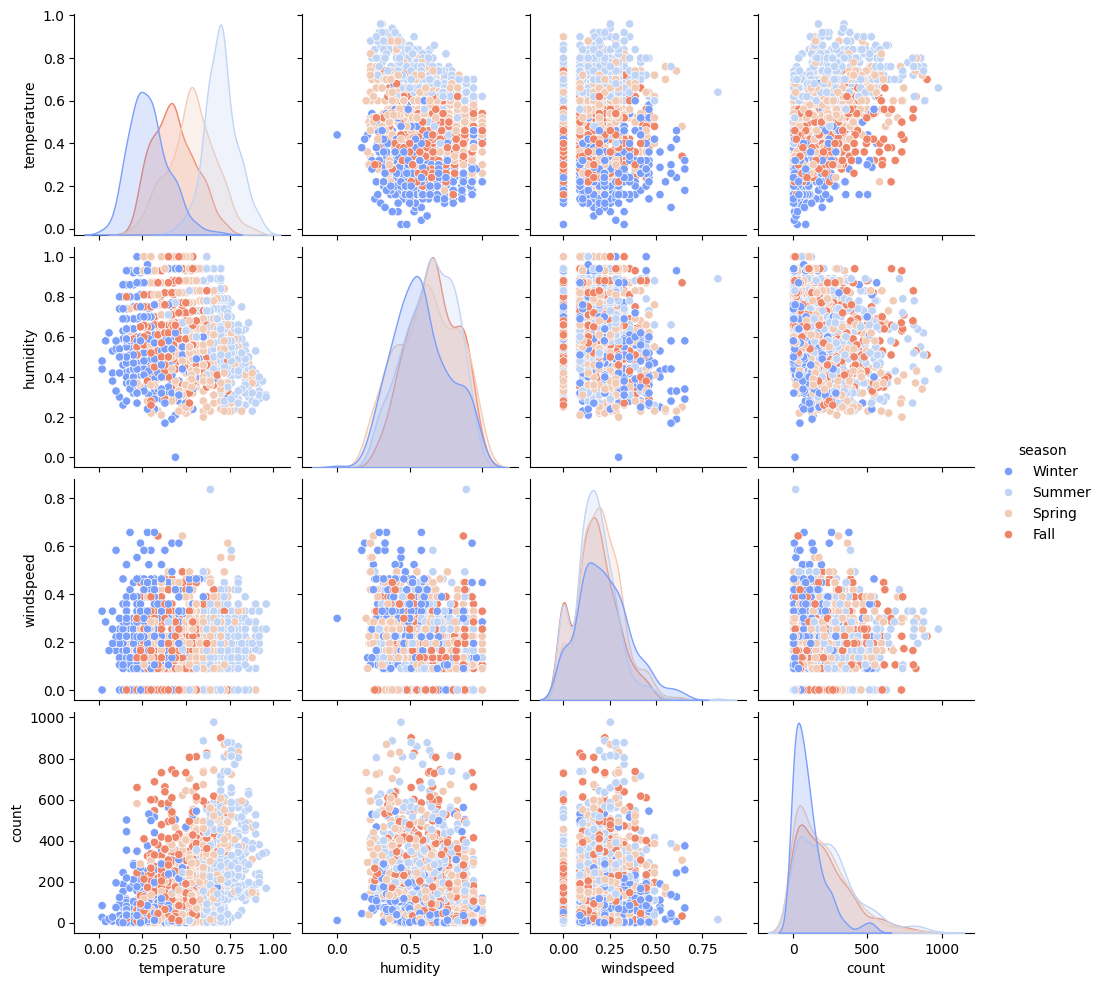

In [14]:
sns.pairplot(bike_sample,hue='season',palette='coolwarm')

<Axes: xlabel='workingday', ylabel='count'>

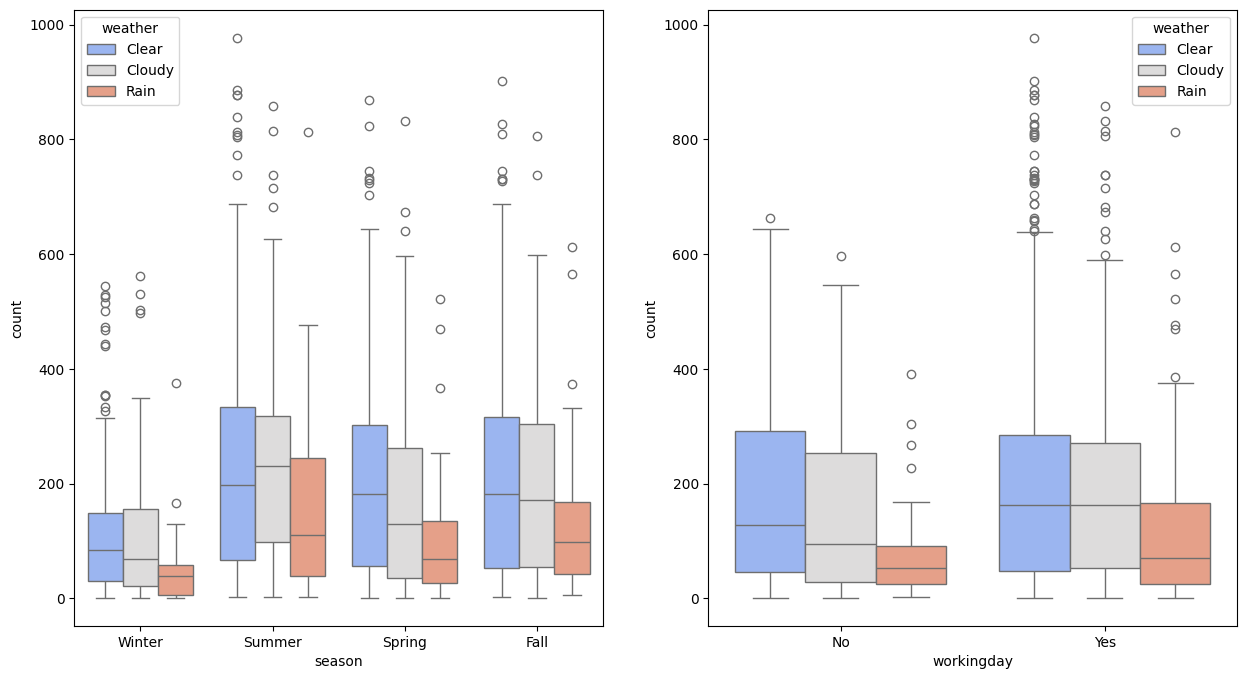

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x='season', y='count', hue='weather',data=bike_sample, palette="coolwarm", ax=ax[0])
sns.boxplot(x='workingday', y='count', hue='weather',data=bike_sample, palette="coolwarm", ax=ax[1])

In [ ]:
bike_sample = pd.get_dummies(bike_sample, columns=['season'])
bike_sample['workingday'] = bike_sample['workingday'].map({'Yes':1,'No':0})
bike_sample['weather'] = bike_sample['weather'].map({'Clear':1, 'Cloudy':2, 'Rain':3, 'Storm':4})
bike_sample = bike_sample[[c for c in bike_sample if c not in ['count']] + ['count']]

In [17]:
bike_sample.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 1738 entries, 10148 to 15268
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   workingday     1738 non-null   int64  
 1   weather        1738 non-null   int64  
 2   temperature    1738 non-null   float64
 3   humidity       1738 non-null   float64
 4   windspeed      1738 non-null   float64
 5   season_Fall    1738 non-null   bool   
 6   season_Spring  1738 non-null   bool   
 7   season_Summer  1738 non-null   bool   
 8   season_Winter  1738 non-null   bool   
 9   count          1738 non-null   int64  
dtypes: bool(4), float64(3), int64(3)
memory usage: 101.8 KB


In [18]:
bike_sample.to_csv('input_bike_sample.csv')

In [19]:
bike_sample = pd.read_csv("input_bike_sample.csv")
bike_sample = bike_sample.drop(bike_sample.columns[[0]],axis=1)

In [33]:
X = bike_sample.drop(columns=['count'])  
y = bike_sample['count']  

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}")
print(f"Train R2: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R2: {test_r2:.2f}")

Train MSE: 22769.83
Train R2: 0.26
Test MSE: 23179.18
Test R2: 0.27


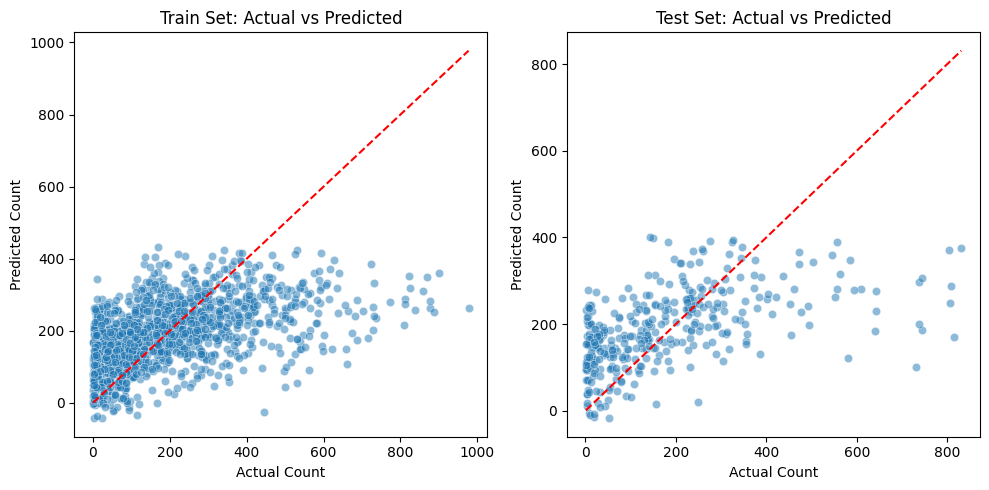

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Train Set: Actual vs Predicted')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()